# **Application de la régression**

La régression est une méthode statistique utilisée pour modéliser la relation entre une variable dépendante et une ou plusieurs variables indépendantes. Elle permet de prédire des valeurs continues en fonction de ces variables explicatives. Le but est de trouver une fonction qui minimise l'écart entre les prédictions et les valeurs réelles. Il existe plusieurs types de régression, dont la régression linéaire, qui suppose une relation linéaire entre les variables, et la régression logistique, utilisée pour les variables catégorielles.

## **0. Imports**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

## **1. Charger les données**

L'**_ensemble de données California Housing_** contient des informations sur les prix de l'immobilier en Californie, avec des caractéristiques telles que le revenu, l'âge des maisons ect. L'objectif est de prédire la valeur médiane des maisons en fonction de ces facteurs, ce qui en fait un ensemble de données idéal pour les tâches de régression.

In [21]:
data_h = fetch_california_housing()

Les ensembles de données inclus dans scikit-learn sont généralement stockés sous forme d'objets, qui contiennent des informations sur l'ensemble de données (metadonnées) ainsi que les données réelles.

In [22]:
data_h.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [23]:
data_h.target # colonne à predire output

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [24]:
data_h["data"] # données

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [25]:
data_h.data.shape # taille du dataset

(20640, 8)

In [26]:
data_h['feature_names'] #caracteristiques

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [27]:
data=pd.DataFrame(data_h["data"], columns=data_h['feature_names'])
data.describe() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [28]:
#Normalisation
for att in range(data.shape[1]):
    data.iloc[:,att]=(data.iloc[:,att]-data.iloc[:,att].min())/(data.iloc[:,att].max()-data.iloc[:,att].min())
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [29]:
X, y = data, data_h.target 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # separer les données en entrainnement et test

## **2. Regression Linéaire**

In [31]:
lr_model = LinearRegression()#creer une instance du modele

In [32]:
lr_model.fit(X_train, y_train)# entrainnement du modele

LinearRegression()

In [33]:
lr_pred = lr_model.predict(X_test)# test du modele

In [34]:
# Evaluation
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, lr_pred))#erreur quadratique moyenne
print("R²:", r2_score(y_test, lr_pred))#coefficient de détermination 

Linear Regression:
MSE: 0.555891598695244
R²: 0.5757877060324511


C:\Users\mayah\AppData\Local\Temp\ipykernel_26688\3059702656.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2,color="black")


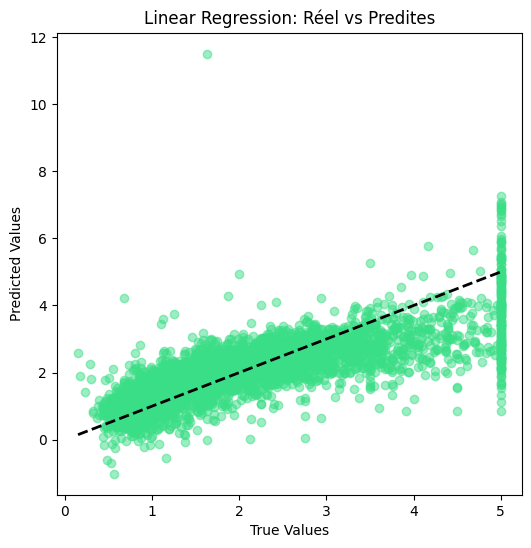

In [35]:
COLOR="#3ade86"
def vis(model_name, pred):# fonction pour visualiser
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, pred, alpha=0.5,color=COLOR)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2,color="black")
    plt.title(f"{model_name}: Réel vs Predites")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

vis("Linear Regression",lr_pred)

## **3. Réseau de neuronnes artificel**

Regression typique d'un reseau de neuonnes à plusieurs couches MLP:

| Hyperparamètre               | Valeur typique                                           |
|------------------------------|----------------------------------------------------------|
| Neurones de la couche d'entrée | Un par caractéristique                                    |
| Neurones des couches cachées  | Dépend du problème                                       |
| Activation des couches cachées| ReLU                                                     |
| Neurones de sortie            | 1 par dimension de prédiction                            |
| Activation de la couche de sortie | Aucune ou ReLU/Softplus (si sorties positives) ou Logistic/Tanh (si sorties bornées) |
| Fonction de perte             | MSE ou MAE (pour les valeurs aberrantes)                |

In [36]:
# creation du modele
def create_model( activation):
    ann_model = Sequential([
    Dense(64, activation=activation, input_shape=(X_train.shape[1],)),# premiere couche cachée 64 neuronnes 
    Dense(32, activation=activation),#2ieme couche cachée 32 neuronne
    Dense(1)#couche de sortie 1 neuronne
])
    ann_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])#fonction d optimisation des poids Adam avec taux d apprentissage: 0.01
    #fonction de perte erreur quadratique moyennen, metrique a suivre est la perte
    return ann_model

In [37]:
model = KerasRegressor(model=create_model, verbose=0)

### Le FineTuning

In [38]:
param_grid = {#parametres a tester
    'model__activation': ['relu', 'tanh'],
    'epochs':[50,25], #nombre d epoch lors de l entrainnement
    'batch_size':[32,64]# taille des batch
}
# 'scoring' : utilise l'erreur absolue moyenne négative comme métrique d'évaluation (negative car c'est à maximiser)
# 'cv=3' : validation croisée avec 3 partitions
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='neg_mean_absolute_error', cv=3)
grid.fit(X_train, y_train)#lancer l entrainnement

c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().

GridSearchCV(cv=3,
             estimator=KerasRegressor(model=<function create_model at 0x0000027341955D00>, verbose=0),
             param_grid={'batch_size': [32, 64], 'epochs': [50, 25],
                         'model__activation': ['relu', 'tanh']},
             scoring='neg_mean_absolute_error')

In [ ]:
grid.best_params_ #meilleure configuration

{'batch_size': 32, 'epochs': 50, 'model__activation': 'relu'}

In [43]:
cv_res = grid.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):#resultats des differentes configurations
    print(-mean_score, params) 

0.4146256673664501 {'batch_size': 32, 'epochs': 50, 'model__activation': 'relu'}
0.4163143014356274 {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh'}
0.42605161227943017 {'batch_size': 32, 'epochs': 25, 'model__activation': 'relu'}
0.45024819383424264 {'batch_size': 32, 'epochs': 25, 'model__activation': 'tanh'}
0.44401712328651327 {'batch_size': 64, 'epochs': 50, 'model__activation': 'relu'}
0.4222615653458388 {'batch_size': 64, 'epochs': 50, 'model__activation': 'tanh'}
0.4206676591891321 {'batch_size': 64, 'epochs': 25, 'model__activation': 'relu'}
0.45418999108573027 {'batch_size': 64, 'epochs': 25, 'model__activation': 'tanh'}


In [44]:
ann_model = grid.best_estimator_#on retient le model avec les meilleurs parametres

{'loss': [0.6598107814788818, 0.49403536319732666, 0.46675774455070496, 0.44505545496940613, 0.4400119483470917, 0.41942834854125977, 0.4261232912540436, 0.40082848072052, 0.40205615758895874, 0.39295610785484314, 0.3839932084083557, 0.3857559263706207, 0.3831936717033386, 0.387102872133255, 0.3671751618385315, 0.3676010072231293, 0.3666589558124542, 0.3691716492176056, 0.3563920557498932, 0.359591543674469, 0.353074848651886, 0.354561448097229, 0.35243502259254456, 0.3500269651412964, 0.34939301013946533, 0.3445363938808441, 0.34979864954948425, 0.3432825803756714, 0.34644779562950134, 0.3377566337585449, 0.33569151163101196, 0.33869174122810364, 0.3323653042316437, 0.3404429256916046, 0.3316090703010559, 0.33689945936203003, 0.3369464576244354, 0.33294934034347534, 0.3250751495361328, 0.3304558992385864, 0.32744625210762024, 0.3331619203090668, 0.33283165097236633, 0.33049964904785156, 0.3267323672771454, 0.3317730724811554, 0.3274526596069336, 0.3251766264438629, 0.3212253451347351,

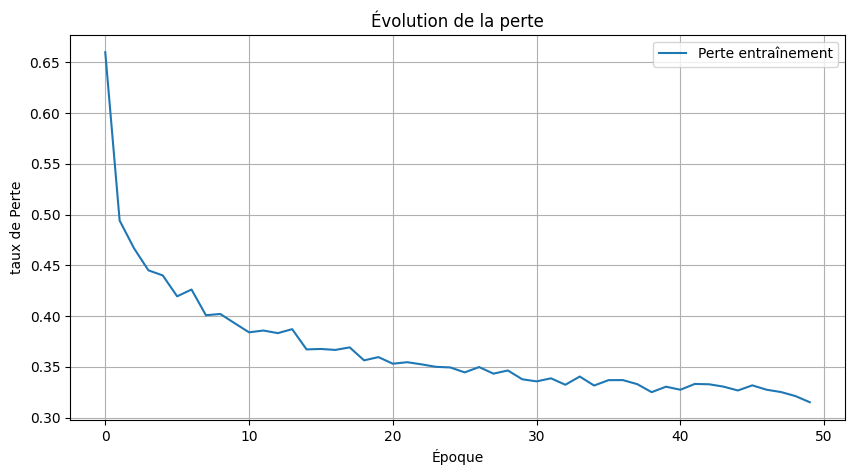

In [ ]:
best_model_history = grid.best_estimator_.model_.history.history

plt.figure(figsize=(10, 5))

plt.plot(best_model_history['loss'], label='Perte entraînement')#l'historique des pertes enregistré pour chaque epoch
print(best_model_history)
plt.title('Évolution de la perte en fonction des epochs')
plt.xlabel('Époque')
plt.ylabel('taux de Perte')
plt.legend()
plt.grid()

plt.show()


In [ ]:
predictions = ann_model.predict(X_test) #tester
mae = mean_squared_error(y_test, predictions) # niveau d'erreur atteint
mae

np.float64(0.3600945452010453)

C:\Users\mayah\AppData\Local\Temp\ipykernel_17804\3059702656.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2,color="black")


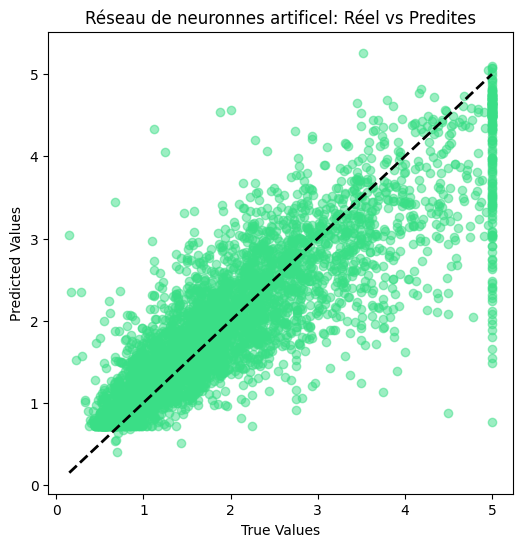

In [47]:
vis("Réseau de neuronnes artificel", predictions) #visualisation